## 1. Linear regression impact on outliers

Using the provided dataset, fit a straight-line regression model that best represents the relationship between the input variable (x) and the output variable (y). Then, create a scatter plot of the actual data points (x vs y) and overlay the regression line on the same graph to visually compare the model with the data.

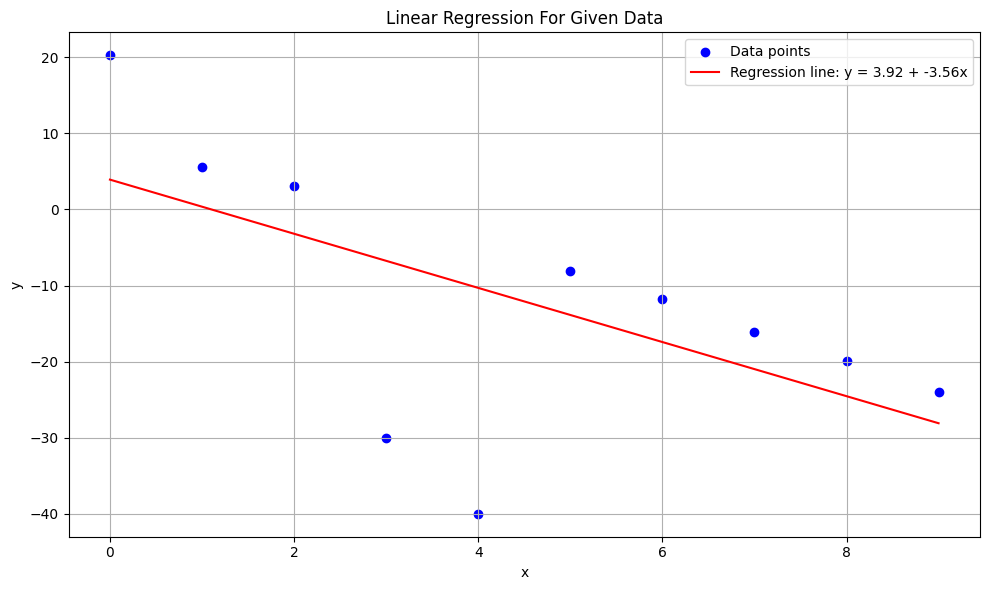

Regression Line Equation: y =-3.56x + 3.92


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data points (Table 1: Data Set)
x_i = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_i = [20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03]

# Create design matrix X (with a column of 1s for intercept) and target vector Y
X = np.array([[1, x] for x in x_i])
Y = np.array([[y] for y in y_i])

# print("X =", X)
# print("Y =", Y)

# Apply OLS formula: w = (X^T X)^(-1) X^T Y
X_T = X.T
w_OLS = np.linalg.inv(X_T @ X) @ X_T @ Y

# Extract coefficients
intercept = w_OLS[0, 0]
slope = w_OLS[1, 0]

# Predict y values using the regression model
x_range = np.linspace(min(x_i), max(x_i), 100)
y_predicted = intercept + slope * x_range

# Step 4: Plot original data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_i, y_i, color='blue', label='Data points')
plt.plot(x_range, y_predicted, color='red', label=f'Regression line: y = {intercept:.2f} + {slope:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression For Given Data')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

print(f"Regression Line Equation: y ={slope:.2f}x + {intercept:.2f}")


**Q5**
- To minimize the influence of outliers, we need a **β** that focuses on typical errors (inliers) while preventing large errors (outliers) from dominating.

- **β = 10⁻⁶ (too small):**  
  Since almost all residuals are much larger than β, every term becomes nearly 1, giving **L = 1.000** for both models.  
  In this case, outliers dominate completely, and the models cannot be distinguished.  

- **β = 10³ (too large):**  
  Here, almost all residuals are much smaller than β, so the terms are close to 0.  
  As a result, the losses are almost zero for both models, meaning the errors are under-penalized and no useful comparison is possible.  

- **β = 1 (well-scaled):**  
  Small errors (inliers) are weighted quadratically, while large errors (outliers) are limited.  
  This produces a clear separation (**0.435 vs 0.973**), reduces the effect of outliers, and still lets inliers drive the fitting process.  
  Thus, **β = 1** provides the most balanced and informative result.



**Q6**  

For the model comparison, a robust loss function with a **β value of 1** was employed.  
This setting mitigates the influence of outliers, letting the evaluation center on the underlying data trend rather than being distorted by extreme observations.  

- **Model 1 Loss:** 0.43542  
- **Model 2 Loss:** 0.97339  

Since minimization is the objective, **Model 1 is the clear preferred option.**  

The superior score for Model 1 validates its enhanced robustness with outliers.  
It maintains predictive trustworthiness even when atypical observations are present.  
Conversely, the larger loss for Model 2 suggests vulnerability; the model cannot accurately encode the data geometry when the influence of aberrant points is moderated.  

**Conclusion:**  
The evaluation using the robust loss at **β = 1** identifies **Model 1** as the preferred candidate.  
It consistently reveals the data’s underlying pattern and retains stable performance despite noise,  
illustrating greater adaptability than Model 2 across assessed conditions.



**Q7**

A robust loss estimator functions by reducing the influence that abnormal points (outliers) have on the overall model evaluation.  

- **When the error is relatively small compared to β (|yᵢ – y’| ≪ β):**  
  The loss increases quadratically, behaving the same way as in ordinary regression, so regular data points are fully considered.  

- **When the error is very large (|yᵢ – y’| ≫ β):**  
  The loss stops growing rapidly and levels off. This prevents extreme values from disproportionately pulling the model away from the main data trend.  

- **Because β appears in the denominator:**  
  The effect of larger errors gradually diminishes, which effectively down-weights the role of outliers in the loss calculation.  

**Conclusion:**  
The estimator emphasizes fitting the bulk of the data while reducing the impact of rare extreme values.  
This produces a model that is more robust, less sensitive to anomalies, and better reflects the actual underlying relationship in the dataset.  



**Q8**

Unlike the **Mean Squared Error (MSE)**, this loss function flattens for large residuals because the Lorentzian norm increases more slowly in the tails.  
Outlier data points, which would otherwise exert strong influence under a quadratic model, have much less effect here.  

For moderate residuals (typical inliers), the Lorentzian behaves similarly to a quadratic penalty, ensuring the model follows the central trend of the data.  
Since the loss response gradually approaches a constant for large errors, the model focuses more on the inlier region while ignoring extreme deviations.  

**Conclusion:**  
The fitted model remains close to the main data pattern while naturally reducing the impact of anomalous residuals.


## 2. Loss Function

Table: MSE and BCE loss for different predictions (y = 1)
Prediction ŷ |    MSE    |    BCE
-----------------------------------
   0.005    | 0.990025 | 5.298317
   0.010    | 0.980100 | 4.605170
   0.050    | 0.902500 | 2.995732
   0.100    | 0.810000 | 2.302585
   0.200    | 0.640000 | 1.609438
   0.300    | 0.490000 | 1.203973
   0.400    | 0.360000 | 0.916291
   0.500    | 0.250000 | 0.693147
   0.600    | 0.160000 | 0.510826
   0.700    | 0.090000 | 0.356675
   0.800    | 0.040000 | 0.223144
   0.900    | 0.010000 | 0.105361
   1.000    | 0.000000 | 0.000000


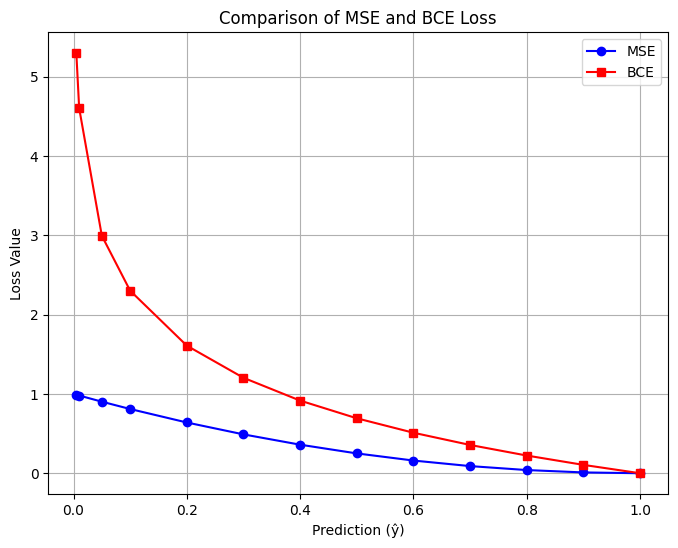

In [7]:
import math
import matplotlib.pyplot as plt

# True label for all samples
y_true = [1] * 11

# Different predicted values
y_pred = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Compute Mean Squared Error for a single prediction
def calculate_mse(y_true, y_pred):
    return (1 - y_pred) ** 2

# Compute Binary Cross Entropy for a single prediction
def calculate_bce(y_true, y_pred):
    epsilon = 1e-15  # Avoid log(0)
    y_pred = max(min(y_pred, 1 - epsilon), epsilon)  # Clip prediction
    return -math.log(y_pred)

# Store loss values
mse_values = []
bce_values = []

# Calculate losses for each prediction
for pred in y_pred:
    mse_values.append(calculate_mse(y_true, pred))
    bce_values.append(calculate_bce(y_true, pred))

# Display a table of results
print("Table: MSE and BCE loss for different predictions (y = 1)")
print("Prediction ŷ |    MSE    |    BCE")
print("-" * 35)
for pred, mse, bce in zip(y_pred, mse_values, bce_values):
    print(f"   {pred:.3f}    | {mse:.6f} | {bce:.6f}")

# Plot both MSE and BCE in the same figure
plt.figure(figsize=(8, 6))
plt.plot(y_pred, mse_values, 'b-o', label='MSE')  # Blue line for MSE
plt.plot(y_pred, bce_values, 'r-s', label='BCE')  # Red line for BCE
plt.xlabel('Prediction (ŷ)')
plt.ylabel('Loss Value')
plt.title('Comparison of MSE and BCE Loss')
plt.grid(True)
plt.legend()
plt.show()


### 2. Selected Loss Functions for Each Application

**• Application 1:** Linear Regression (Continuous Dependent Variable)  
**• Chosen Loss Function:** Mean Squared Error (MSE)

**Reasons for Choosing MSE:**  
1. MSE works well with continuous variables because:  
   - It calculates the squared difference between predicted and actual values.  
   - Larger errors are penalized more strongly, helping the model focus on reducing big mistakes.  
   - It naturally accommodates both overestimation and underestimation.  
   - The gradient of MSE is directly proportional to the error, simplifying optimization during training.  

2. Why BCE is not appropriate:  
   - BCE is intended for probability outputs between 0 and 1.  
   - It is tailored for binary classification, not continuous targets.  
   - Applying BCE to continuous data can result in unpredictable or incorrect behavior.  

---

**• Application 2:** Logistic Regression (Binary Dependent Variable)  
**• Chosen Loss Function:** Binary Cross Entropy (BCE)

**Reasons for Choosing BCE:**  
1. BCE is ideal for binary classification because:  
   - It is designed to work with probabilities in the [0,1] range.  
   - It quantifies the difference between predicted probability and true distribution.  
   - It generates strong gradients when the model is confident but incorrect, improving learning.  
   - It aligns perfectly with the output of the logistic (sigmoid) function.  

2. Why MSE is less suitable:  
   - MSE does not consider the probabilistic nature of binary outcomes.  
   - It may result in slower convergence for binary classification tasks.  
   - Gradients can become very small when predictions are far from the actual labels, slowing learning.


## 3. Data pre-processing

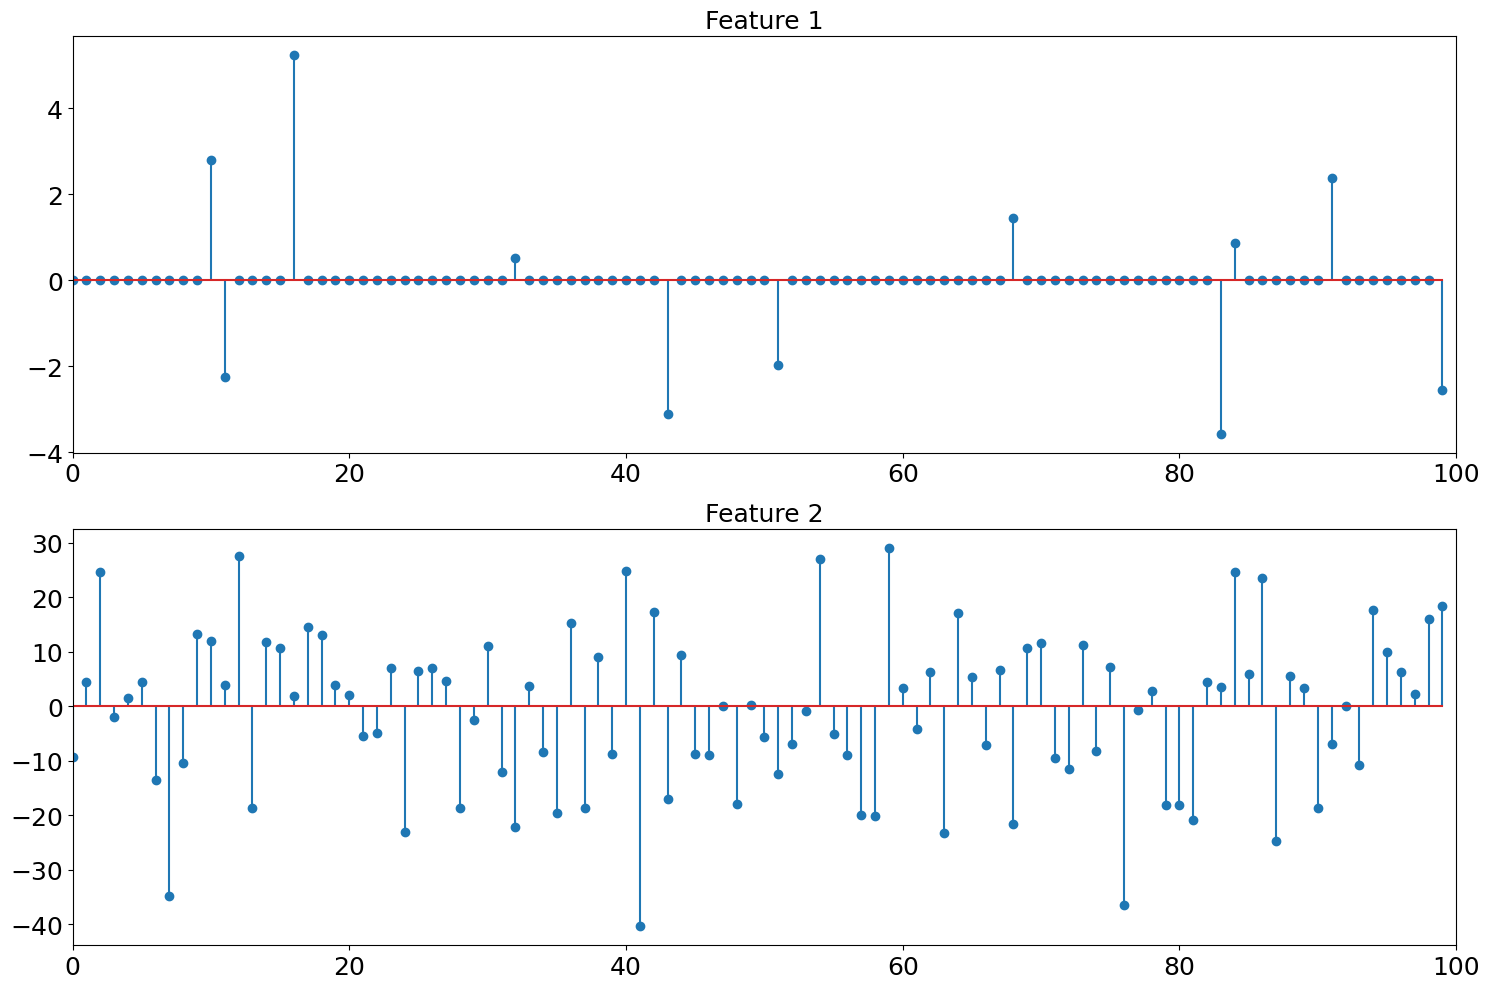

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def create_sparse_signal(length, nonzero_count):
    signal = np.zeros(length)
    indices_nonzero = np.random.choice(length, nonzero_count, replace=False)
    values_nonzero = 10 * np.random.randn(nonzero_count)
    signal[indices_nonzero] = values_nonzero
    return signal

# Parameters for signal generation
total_length = 100  # Total length of the signal
nonzero_elements = 10    # Number of non-zero values in the signal
my_index = 220332  # Your index number (numbers only, no letters)

# Generate the sparse signal
signal_data = create_sparse_signal(total_length, nonzero_elements)

# Modify a specific element based on index number
signal_data[10] = (my_index % 10) * 2 + 10
if my_index % 10 == 0:
    signal_data[10] = np.random.randn(1) + 30

# Normalize the signal
signal_data = signal_data / 5


# Generate random noise for second feature
noise_feature = np.random.normal(0, 15, total_length)

# Visualization
plt.figure(figsize=(15, 10))

# Plot first feature (sparse signal)
plt.subplot(2, 1, 1)
plt.xlim(0, total_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(signal_data)

# Plot second feature (random noise)
plt.subplot(2, 1, 2)
plt.xlim(0, total_length)
plt.title("Feature 2", fontsize=18)
plt.stem(noise_feature)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

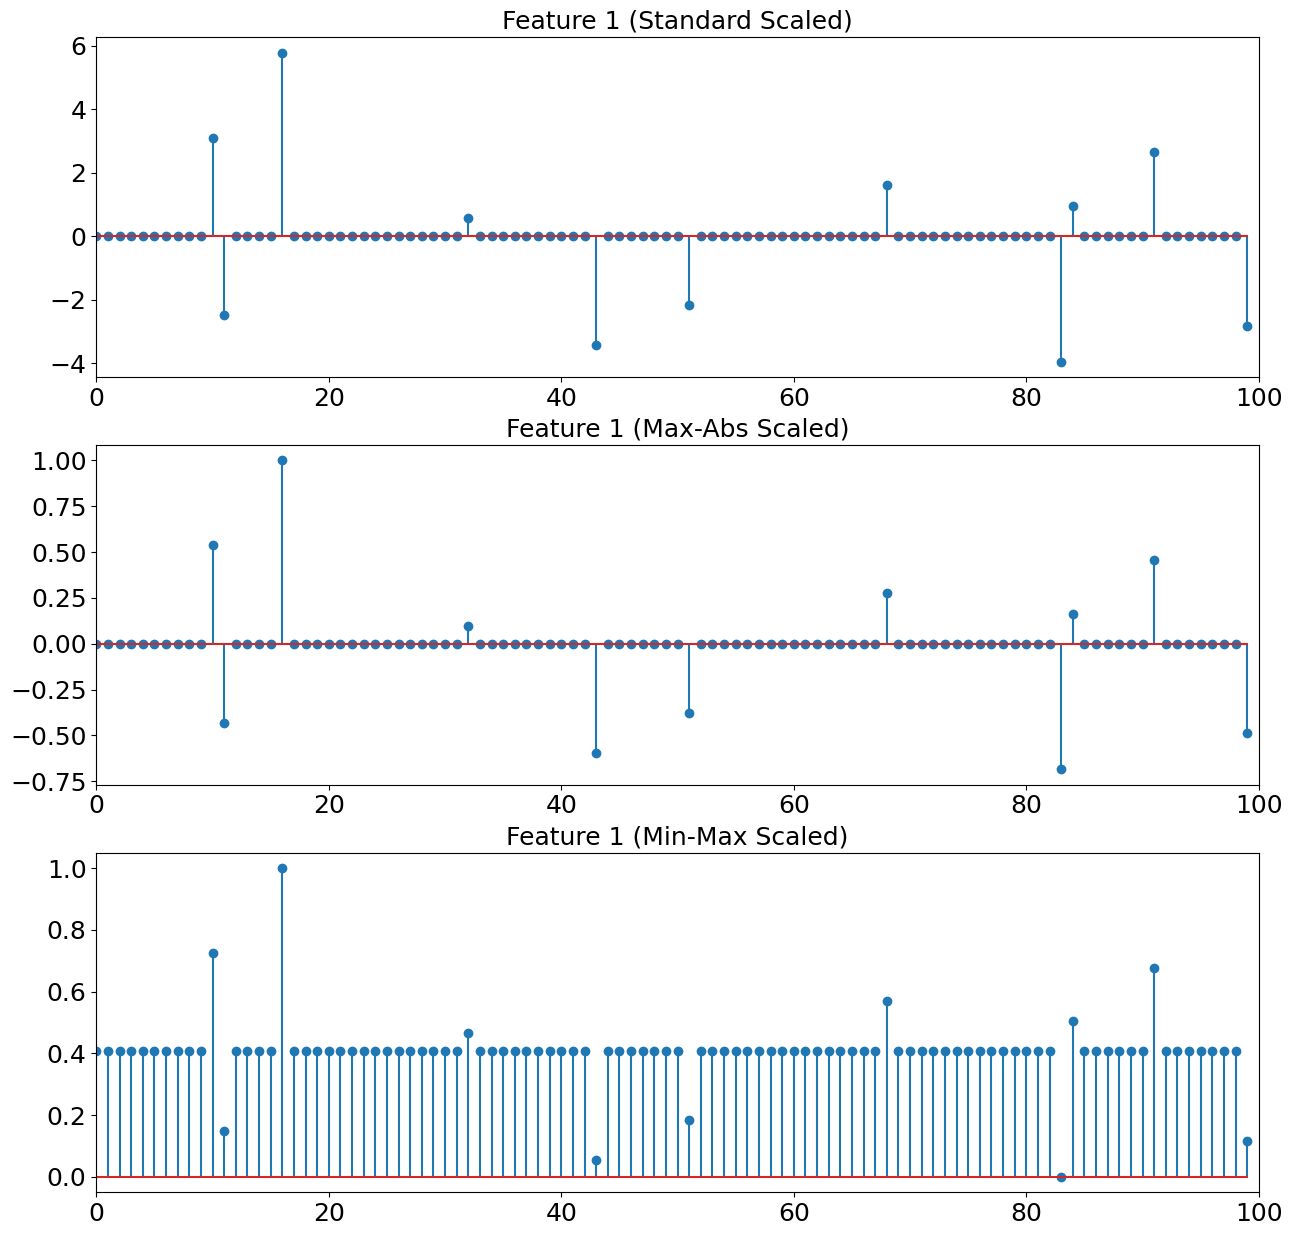

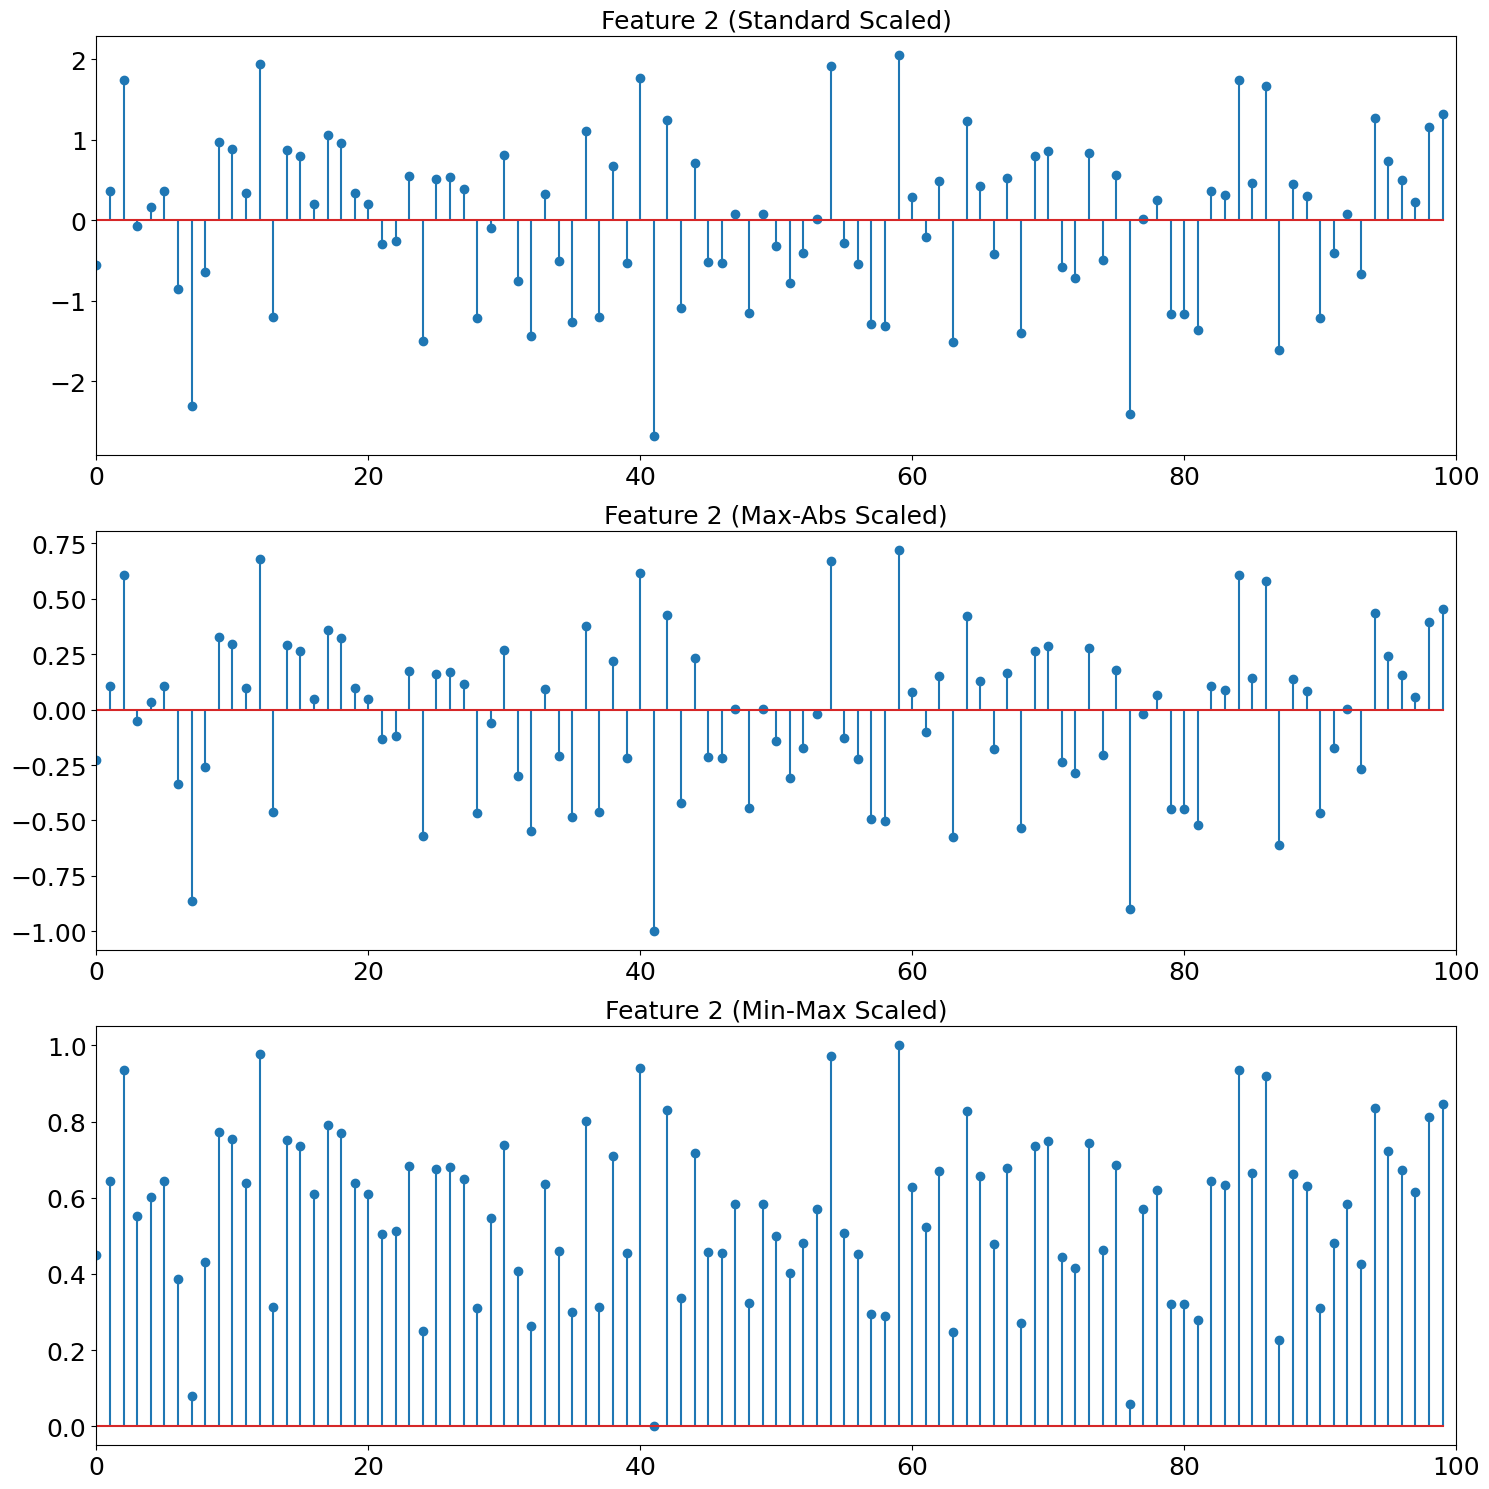

In [6]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Initialize the scaling methods
maxabs_scaler = MaxAbsScaler()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply scalers to Feature 1 (sparse signal)
feature1_scaled_maxabs = maxabs_scaler.fit_transform(signal_data.reshape(-1, 1)).ravel()
feature1_scaled_std = standard_scaler.fit_transform(signal_data.reshape(-1, 1)).ravel()
feature1_scaled_minmax = minmax_scaler.fit_transform(signal_data.reshape(-1, 1)).ravel()

# Apply scalers to Feature 2 (noise)
feature2_scaled_maxabs = maxabs_scaler.fit_transform(noise_feature.reshape(-1, 1)).ravel()
feature2_scaled_std = standard_scaler.fit_transform(noise_feature.reshape(-1, 1)).ravel()
feature2_scaled_minmax = minmax_scaler.fit_transform(noise_feature.reshape(-1, 1)).ravel()

# -------- Plot transformations of Feature 1 -------- #
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.xlim(0, total_length)
plt.title("Feature 1 (Standard Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature1_scaled_std)

plt.subplot(3, 1, 2)
plt.xlim(0, total_length)
plt.title("Feature 1 (Max-Abs Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature1_scaled_maxabs)

plt.subplot(3, 1, 3)
plt.xlim(0, total_length)
plt.title("Feature 1 (Min-Max Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature1_scaled_minmax)

# -------- Plot transformations of Feature 2 -------- #
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.xlim(0, total_length)
plt.title("Feature 2 (Standard Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature2_scaled_std)

plt.subplot(3, 1, 2)
plt.xlim(0, total_length)
plt.title("Feature 2 (Max-Abs Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature2_scaled_maxabs)

plt.subplot(3, 1, 3)
plt.xlim(0, total_length)
plt.title("Feature 2 (Min-Max Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature2_scaled_minmax)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Selection of Scaling Methods for the Two Features  

**• Feature 1: Sparse Signal**  
- **Chosen Method:** Max-Abs Scaler  
- **Justification:** Max-Abs scaling preserves sparsity and retains signal polarity. By mapping values to the interval [–1,1] and avoiding mean shift, the structure of the sparse signal is unchanged, making this method ideal for inputs that contain many zeros while maximizing support for the strongest coefficients.  

**• Feature 2: Random Noise**  
- **Chosen Method:** Standard Scaler  
- **Justification:** Standard scaling is appropriate for approximately Gaussian distributions. By centering the data to zero and normalizing to unit variance, the method harmonizes the variance of the noise across features. It accommodates the original distribution shape and is relatively robust to extreme values in comparison to min-max or robust scaling.  

